In [36]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.signal as ss

In [110]:
data = np.loadtxt("test3_100_Hg.csv", delimiter=',', skiprows=10)

t_vals = data[:, 0]
V_vals = -data[:, 1]

t_adjusted = t_vals - np.full_like(t_vals, min(t_vals))

t_clipped = t_adjusted[:-58]

wavelength_A = (t_clipped*1.667 + np.full_like(t_clipped, 650*6)) 

wavelength_nm = np.full_like(t_clipped, 650*6/10-10) + t_clipped

#wavelength_nm_clipped = wavelength_nm
V_vals_clipped = V_vals[:-58]

#len(wavelength_nm_clipped)

print((t_clipped))
print(wavelength_nm)


[  0.           0.59988002   1.19976004   1.79964006   2.39952008
   2.9994001    3.59928012   4.19916014   4.79904016   5.39892018
   5.9988002    6.59868022   7.19856024   7.79844026   8.39832028
   8.9982003    9.59808032  10.19796034  10.79784036  11.39772038
  11.9976004   12.59748042  13.19736044  13.79724046  14.39712048
  14.9970005   15.59688052  16.19676054  16.79664056  17.39652058
  17.9964006   18.59628062  19.19616064  19.79604066  20.39592068
  20.9958007   21.59568072  22.19556074  22.79544076  23.39532078
  23.9952008   24.59508082  25.19496084  25.79484086  26.39472088
  26.9946009   27.59448092  28.19436094  28.79424096  29.39412098
  29.994001    30.59388102  31.19376104  31.79364106  32.39352108
  32.9934011   33.59328112  34.19316114  34.79304116  35.39292118
  35.9928012   36.59268122  37.19256124  37.79244126  38.39232128
  38.9922013   39.59208132  40.19196134  40.79184136  41.39172138
  41.9916014   42.59148142  43.19136144  43.79124146  44.39112148
  44.99100

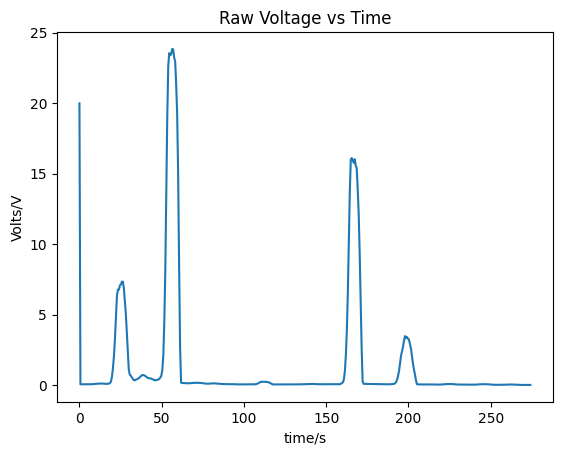

In [111]:
plt.plot(t_adjusted,V_vals)
plt.xlabel('time/s')
plt.ylabel('Volts/V')
plt.title('Raw Voltage vs Time')
plt.show()

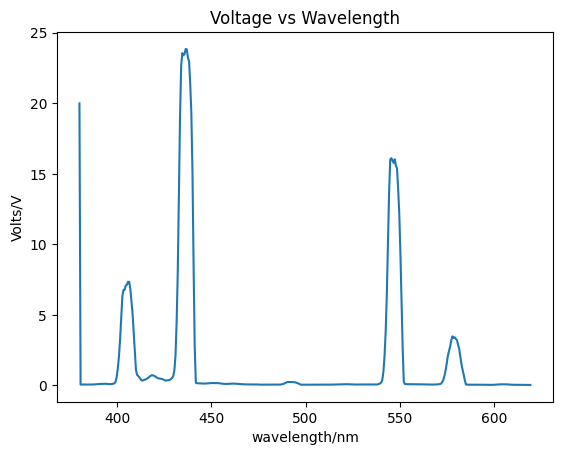

In [112]:


plt.plot(wavelength_nm,V_vals_clipped)
plt.xlabel('wavelength/nm')
plt.ylabel('Volts/V')
plt.title('Voltage vs Wavelength')
plt.show()

In [113]:
wavelength_nm_clipped = wavelength_nm[10:]
V_vals_clipped1 = V_vals_clipped[10:]

peak_idx, _ = ss.find_peaks(V_vals_clipped1, height=2, width=4)

peak_vals = []
V_peak_vals = []

for idx in peak_idx:

    peak_vals.append(wavelength_nm_clipped[int(idx)])
    V_peak_vals.append(V_vals_clipped1[int(idx)])





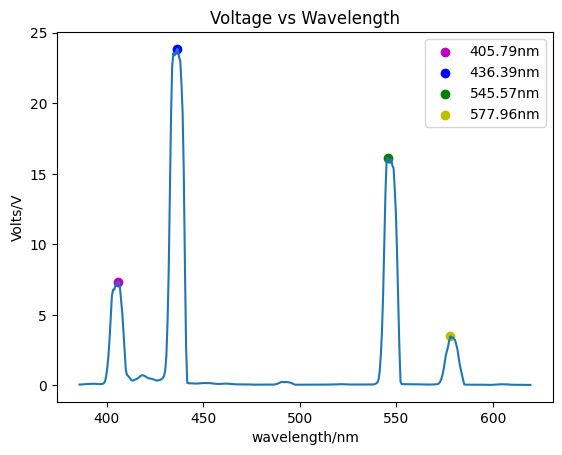

In [114]:
plt.plot(wavelength_nm_clipped,V_vals_clipped1)
colors = np.array(['m','b','g','y'])
for i in range(len(peak_vals)):
    plt.scatter(peak_vals[i], V_peak_vals[i], c=colors[i], label=f"{peak_vals[i]:.2f}nm")
plt.xlabel('wavelength/nm')
plt.ylabel('Volts/V')
plt.title('Voltage vs Wavelength')
plt.legend()
plt.show()